In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


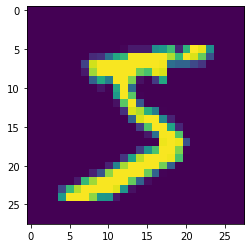

In [6]:
plt.imshow(X_train[0])

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
only_zeros = X_train[y_train == 0]

In [9]:
only_zeros.shape

(5923, 28, 28)

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential

In [34]:
discriminator = Sequential()

discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150, activation='relu'))
discriminator.add(Dense(100, activation='relu'))

discriminator.add(Dense(1, activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy', optimizer='adam')

discriminator.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 150)               117750    
_________________________________________________________________
dense_8 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 132,951
Trainable params: 132,951
Non-trainable params: 0
_________________________________________________________________


In [35]:
coding_size = 100
generator = Sequential()

generator.add(Dense(100, activation='relu', input_shape=[coding_size]))
generator.add(Dense(150, activation='relu'))
generator.add(Dense(784, activation='relu'))
generator.add(Reshape([28,28]))

In [36]:
GAN = Sequential([generator, discriminator])

In [37]:
discriminator.trainable = False

In [38]:
GAN.compile(loss='binary_crossentropy', optimizer='adam')

In [39]:
batch_size = 32

In [40]:
my_data = only_zeros

In [41]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [42]:
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [43]:
epochs = 10

In [44]:
generator, discriminator = GAN.layers

for epoch in range(epochs):
  print(f"Currently on epoch {epoch + 1}")
  i = 0

  for X_batch in dataset:
    i = i + 1

    if i%100 == 0:
      print(f"\tCurrently on batch number {i} of ({ len(my_data)// batch_size })")
    
    # Discriminator training phase
    noise = tf.random.normal(shape=[batch_size, coding_size])
    gen_images = generator(noise)

    X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch, tf.float32)], axis=0)
    y1 = tf.constant([[0.0]] * batch_size + [[1.0]] * batch_size)

    discriminator.trainable = True
    discriminator.train_on_batch(X_fake_vs_real, y1)

    # Train generator
    noise = tf.random.normal(shape=[batch_size, coding_size])
    y2 = tf.constant([[1.0]] * batch_size)
    discriminator.trainable = False

    GAN.train_on_batch(noise, y2)

Currently on epoch 1
	Currently on batch number 100 of (185)
Currently on epoch 2
	Currently on batch number 100 of (185)
Currently on epoch 3
	Currently on batch number 100 of (185)
Currently on epoch 4
	Currently on batch number 100 of (185)
Currently on epoch 5
	Currently on batch number 100 of (185)
Currently on epoch 6
	Currently on batch number 100 of (185)
Currently on epoch 7
	Currently on batch number 100 of (185)
Currently on epoch 8
	Currently on batch number 100 of (185)
Currently on epoch 9
	Currently on batch number 100 of (185)
Currently on epoch 10
	Currently on batch number 100 of (185)


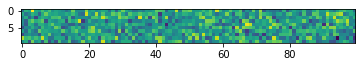

In [45]:
noise = tf.random.normal(shape=[10, coding_size])

plt.imshow(noise)

In [46]:
images = generator(noise)

In [47]:
images.shape

TensorShape([10, 28, 28])

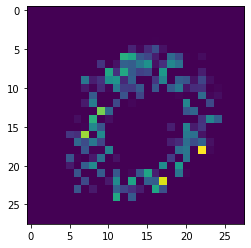

In [51]:
plt.imshow(images[4]);